In [282]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import statistics
from statistics import median,mean
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import ensemble
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

In [283]:
train_data = pd.read_csv("input/train.csv")
test_data = pd.read_csv("input/test.csv")

train_data.info(), test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

(None, None)

In [284]:
train_data.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [285]:
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


<h3>Feature Engineering</h3>
<h4>drop data</h4>
<h5>passengerid, name, cabin, ticket</h5>

<h5>fill na</h5>
<h6>embarked filled random data</h6>
<h6>age filled median by name title(train set)</h6>
<h6>mapping name, embarked, sex</h6>

In [286]:
train_test_set = [train_data, test_data]

drop_list = ["PassengerId", "Cabin", "Name", "Ticket", "SibSp", "Parch"]

title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
sex_mapping = {"male": 0, "female": 1}
em_mapping = {"S":0, "C":1, "Q":2}

for dataset in train_test_set:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)
    dataset['Embarked'] = dataset['Embarked'].map(em_mapping)
    

for dataset in train_test_set:
    dataset['Embarked'].fillna(np.random.randint(0,2), inplace=True)
    dataset["Age"].fillna(train_data["Age"].groupby(train_data["Title"]).transform("median"), inplace=True)
    dataset["Fare"].fillna(train_data["Fare"].groupby(train_data["Embarked"]).transform("mean"), inplace=True)
    
bins = [-1, 5, 10, 17, 30, 77, 1000]
label = [0, 1, 2, 3, 4, 5]

for dataset in train_test_set:
    dataset['Fare'] = pd.cut(dataset['Fare'], bins=bins, labels=label).cat.codes\

    

for dataset in train_test_set:
    dataset["Pclass"] = dataset["Pclass"] - 1
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"]
    
bins = [-1, 11, 18, 22, 27, 33, 40, 66, 1000]
label = [0, 1, 2, 3, 4, 5, 6, 7]

for dataset in train_test_set:
    dataset['Age'] = pd.cut(dataset['Age'], bins=bins, labels=label).cat.codes

for item in drop_list: 
        train_data = train_data.drop(item, axis=1)
        test_data = test_data.drop(item, axis=1)
        
train_y = train_data["Survived"]
train_data = train_data.drop("Survived", axis=1)


In [287]:
'''for dataset in train_test_set:   
    dataset.loc[ dataset['FamilySize'] == 0, 'Family_members_Band'] = 0
    dataset.loc[(dataset['FamilySize'] == 1)|(dataset['FamilySize'] == 2),'Family_members_Band'] = 1
    dataset.loc[ dataset['FamilySize'] == 3, 'Family_members_Band'] = 2
    dataset.loc[(dataset['FamilySize'] == 4)|(dataset['FamilySize'] == 5),'Family_members_Band'] = 3
    dataset.loc[ dataset['FamilySize'] == 6, 'Family_members_Band'] = 4
    dataset.loc[(dataset['FamilySize'] == 7)|(dataset['FamilySize'] == 10),'Family_members_Band'] = 5
    dataset['Family_members_Band'] = dataset['Family_members_Band'].astype(int)'''

"for dataset in train_test_set:   \n    dataset.loc[ dataset['FamilySize'] == 0, 'Family_members_Band'] = 0\n    dataset.loc[(dataset['FamilySize'] == 1)|(dataset['FamilySize'] == 2),'Family_members_Band'] = 1\n    dataset.loc[ dataset['FamilySize'] == 3, 'Family_members_Band'] = 2\n    dataset.loc[(dataset['FamilySize'] == 4)|(dataset['FamilySize'] == 5),'Family_members_Band'] = 3\n    dataset.loc[ dataset['FamilySize'] == 6, 'Family_members_Band'] = 4\n    dataset.loc[(dataset['FamilySize'] == 7)|(dataset['FamilySize'] == 10),'Family_members_Band'] = 5\n    dataset['Family_members_Band'] = dataset['Family_members_Band'].astype(int)"

<h3>One Hot encoding</h3>

In [288]:
train_data.head(50)


,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,2,0,2,1,0.0,0,1
1,0,1,5,4,1.0,2,1
2,2,1,3,1,0.0,1,0
3,0,1,5,4,0.0,2,1
4,2,0,5,1,0.0,0,0
5,2,0,4,1,2.0,0,0
6,0,0,6,4,0.0,0,0
7,2,0,0,3,0.0,3,4
8,2,1,3,2,0.0,2,2
9,1,1,1,4,1.0,2,1


In [289]:
train_data = pd.get_dummies(train_data, columns=['Pclass','Sex','Age','Embarked','Title','FamilySize','Fare'],
                         prefix=['Pclass','Sex','Age','Embarked','Title','FamilySize','Fare'])


In [290]:
train_data.head(10)

,Pclass_0,Pclass_1,Pclass_2,Sex_0,Sex_1,Age_0,Age_1,Age_2,Age_3,Age_4,...,FamilySize_5,FamilySize_6,FamilySize_7,FamilySize_10,Fare_0,Fare_1,Fare_2,Fare_3,Fare_4,Fare_5
0,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
6,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [291]:
test_data = pd.get_dummies(test_data, columns=['Pclass','Sex','Age','Embarked','Title','FamilySize','Fare'],
                         prefix=['Pclass','Sex','Age','Embarked','Title','FamilySize','Fare'])


In [292]:
test_data.head()

,Pclass_0,Pclass_1,Pclass_2,Sex_0,Sex_1,Age_0,Age_1,Age_2,Age_3,Age_4,...,FamilySize_5,FamilySize_6,FamilySize_7,FamilySize_10,Fare_0,Fare_1,Fare_2,Fare_3,Fare_4,Fare_5
0,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [293]:
train_x, val_x, train_y, val_y = train_test_split(train_data, train_y, test_size=0.2, random_state=222)

In [294]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
import tensorflow as tf

with tf.device("/gpu:0"):
    np.random.seed(3)
    tf.random.set_seed(3)

model = Sequential()
model.add(Flatten(input_shape=(35,)))
model.add(Dense(64,activation='tanh'))
Dropout(0.2)
model.add(Dense(32, activation='relu'))
Dropout(0.5)
model.add(Dense(1, activation='sigmoid'))
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
model.summary()


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 35)                0         
                                                                 
 dense_33 (Dense)            (None, 64)                2304      
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dense_35 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


In [295]:
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='binary_crossentropy', metrics=['accuracy'])

In [296]:
batch_size = 2
epochs = 50

hist = model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(val_x, val_y))

Epoch 1/50
356/356 [==============================] - 1s 1ms/step - loss: 0.4955 - accuracy: 0.7865 - val_loss: 0.4954 - val_accuracy: 0.7989
Epoch 2/50
356/356 [==============================] - 0s 741us/step - loss: 0.4485 - accuracy: 0.8048 - val_loss: 0.5077 - val_accuracy: 0.8101
Epoch 3/50
356/356 [==============================] - 0s 713us/step - loss: 0.4397 - accuracy: 0.8244 - val_loss: 0.4273 - val_accuracy: 0.8324
Epoch 4/50
356/356 [==============================] - 0s 747us/step - loss: 0.4125 - accuracy: 0.8216 - val_loss: 0.4880 - val_accuracy: 0.8045
Epoch 5/50
356/356 [==============================] - 0s 755us/step - loss: 0.4150 - accuracy: 0.8188 - val_loss: 0.4476 - val_accuracy: 0.8324
Epoch 6/50
356/356 [==============================] - 0s 707us/step - loss: 0.4004 - accuracy: 0.8329 - val_loss: 0.4585 - val_accuracy: 0.8268
Epoch 7/50
356/356 [==============================] - 0s 707us/step - loss: 0.3973 - accuracy: 0.8413 - val_loss: 0.4597 - val_accuracy: 0

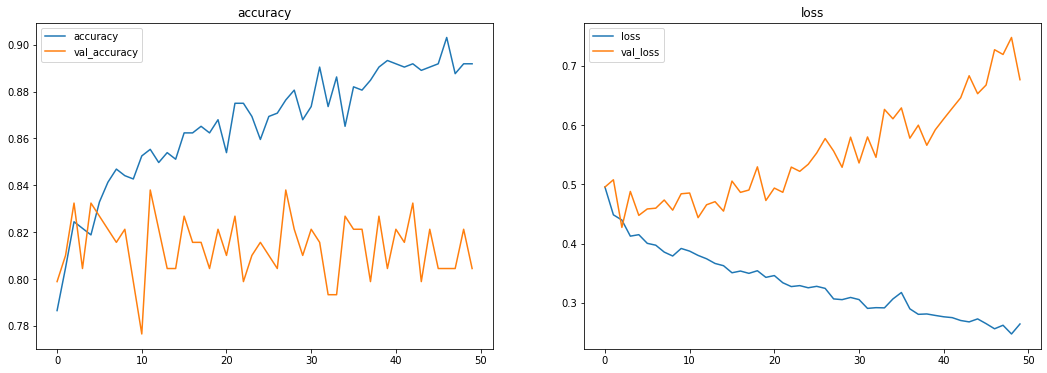

In [297]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(hist.history["accuracy"], label="accuracy")
plt.plot(hist.history["val_accuracy"], label="val_accuracy")
plt.title("accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history["loss"], label="loss")
plt.plot(hist.history["val_loss"], label="val_loss")
plt.title("loss")
plt.legend()

plt.show()

In [298]:
result = model.predict(test_data).reshape(test_data.shape[0])
result = np.where(result>0.5, 1, 0)

In [299]:
test_index = pd.read_csv("input/test.csv")
prediction = list(result)
submission = pd.DataFrame({
        "PassengerId": test_index["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission2.csv', index=False)

In [300]:
rs = pd.read_csv("submission2.csv")
rs.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
